Importing the basic libraries

In [1]:
import pandas as pd
import numpy as np

Fetching and combining all the datasets

In [2]:
df1 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv')
df2 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv')
df3 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv')
frames = [df1, df2, df3]
data = pd.concat(frames)

droping uneccessary columns

In [3]:
data=data.drop(['id','author','subreddit','link_id','parent_id','created_utc','rater_id','example_very_unclear'], axis=1)
data.shape

(211225, 29)

removing duplicate data

In [4]:
data.drop_duplicates(subset='text', inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape

(57732, 29)

Removing data that contain more than one emotion

In [5]:
sum = np.array(data.sum(axis=1))
ind = np.where(np.logical_or(sum>1, sum==0))[0].tolist()
data.drop(ind, inplace = True)
data.reset_index(drop=True, inplace=True)
data.shape

<ipython-input-5-ebb2ee42892f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum = np.array(data.sum(axis=1))


(46741, 29)

Creating a list of all the emotions

In [6]:
emotions = list(data.columns)[1:]

Converting the data to a better format

In [7]:
emo = []
for text in range(0, data.shape[0]):
  for emotion in emotions:
    if data.loc[text][emotion] == 1:
      emo.append(emotion)

data.drop(data.iloc[:, 1:29], inplace=True, axis=1)
data['Emotions']= emo
data     

,text,Emotions
0,That game hurt.,sadness
1,"You do right, if you don't care then fuck 'em!",neutral
2,Man I love reddit.,love
3,"[NAME] was nowhere near them, he was by the Fa...",neutral
4,Right? Considering it’s such an important docu...,gratitude
...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love
46737,I didn’t even notice that one. I noticed the b...,neutral
46738,"Thanks, [NAME]",gratitude
46739,Everyone likes [NAME].,love


Preprocessing Function

In [8]:
import re

def preprocess(text):
  text = re.sub(r'[^\w\s\']',' ',text)
  text = re.sub(r'[ \n]+',' ',text)
  return text.strip().lower()

Preprocessing the data

In [9]:
data.text = data.text.map(preprocess)

Checking the distribution of the data. Here we see that the data is highly imbalanced 

<Axes: >

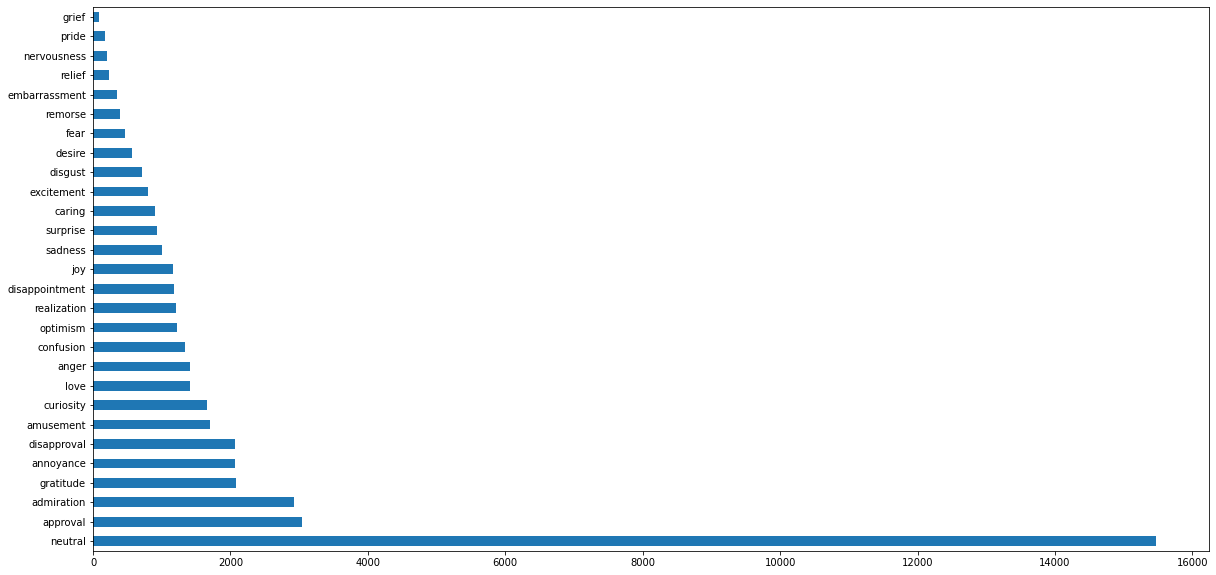

In [10]:
data['Emotions'].value_counts().plot(kind='barh' , figsize =(20,10))

storing the processed data. And also storing the text (it will be used for text embedding)

In [11]:
data.to_csv('processed data.csv' , index = False)
data.to_csv('text.txt' , columns= ['text'] , header = False , index = False)